3주차
===

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from PIL import Image as PILImage
from io import BytesIO

def notebook_dp_image(path: str, dim: set) -> None:
    img = PILImage.open(path)
    resized_img = img.resize(dim)  # (Width, Height)
    buffer = BytesIO()
    resized_img.save(buffer, format='PNG')
    display(Image(data=buffer.getvalue()))

_p63~105까지_

# 신경망

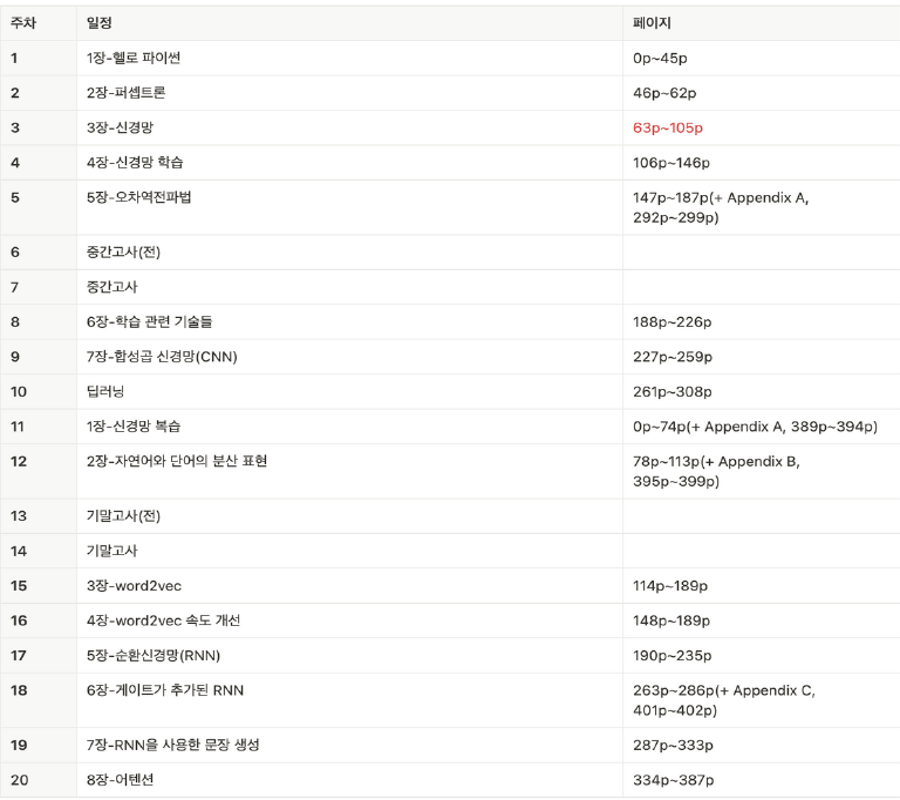

In [2]:
notebook_dp_image('./images/curriculum.png', (900,800))

---

저번시간에서의 간단한 퍼셉트론 예시

$$
\begin{cases}
0 & \text{if } b + w_1 x_1 + w_2 x_2 \le 0 \text{ low}\\
1 & \text{if } b + w_1 x_1 + w_2 x_2 > 0 \text{ high}
\end{cases}
$$
이거랑 비슷하게도 단순히 x의 값의 thresh 넘기면 1출력하는 형식으로도 표현할 수 있다.

위와 같은 "<u>임계치(threshold)를 넘기면 어떤 출력이 나오는</u>"함수들을 ***활성화 함수***라고 한다. 세분화한다면 계단함수<sup>step function</sup>이라고 할수 있지용.

보통 뉴런의 출력 최종 단계에 적용하여 실 출력값의 값이 일정수준 이상 나와야 값이 나오도록 해줌. $\rightarrow output = activation(n(x))$

## 대표적 활성화 함수(들)

In [3]:
# 테스트용 함수
def test_example(func_ut: callable) -> None :
    example_x = np.random.uniform(low=-1, high=1, size=(10,)).round(2)
    [print(f'{a}\t-> {b}') for a, b in zip(example_x, func_ut(example_x))]

### 계단함수
$$
\begin{cases}
0 \text{ if } x \leq 0 \\
1 \text{ if } x \gt 0
\end{cases}
$$

In [4]:
def step_function(x: np.ndarray) -> np.ndarray :
    y = x > 0
    return y.astype(int)

test_example(step_function)

0.93	-> 1
0.36	-> 1
0.71	-> 1
-0.62	-> 0
-0.37	-> 0
0.08	-> 1
-0.7	-> 0
-0.1	-> 0
0.91	-> 1
0.43	-> 1


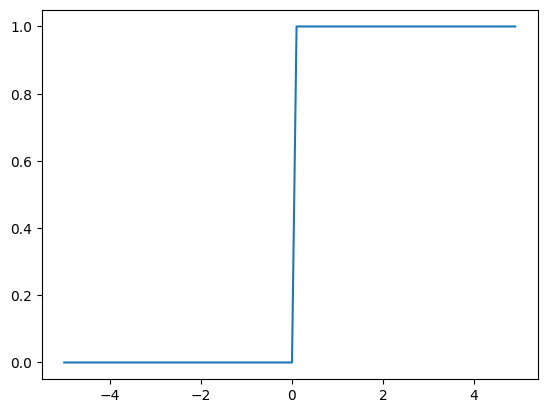

In [5]:
x = np.arange(-5.0, 5.0, .1)
y = step_function(x)
plt.plot(x, y)
plt.show()

### 시그모이드(sigmoid) 함수 (aka. 로지스틱 함수)
$$
y = \frac{1}{1+e^{-x}}
$$

In [6]:
def sigmoid(x: np.ndarray) -> np.ndarray :
    return 1 / (1 + np.exp(-x))

test_example(sigmoid)

0.75	-> 0.679178699175393
0.84	-> 0.6984652160025387
-0.53	-> 0.3705168880326052
-0.14	-> 0.4650570548417855
0.52	-> 0.6271477663131956
0.42	-> 0.6034832498647263
0.13	-> 0.5324543063873187
-0.44	-> 0.3917409692534856
0.45	-> 0.610639233949222
-0.24	-> 0.44028635073280703


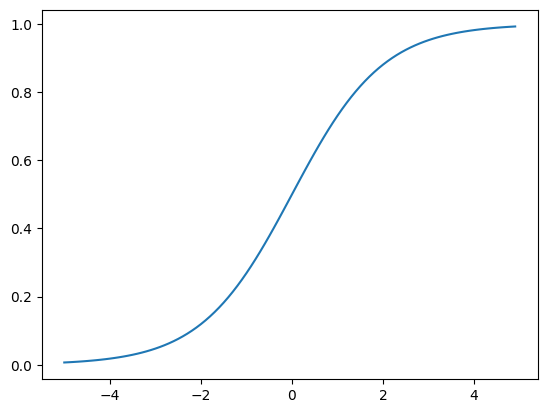

In [7]:
x = np.arange(-5.0, 5.0, .1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### ReLU (Rectified Linear Unit)
$$
\begin{cases}
0 \text{ if } x \leq 0 \\
y = x \text{ if } x \gt 0
\end{cases}
$$

- *Rectified* $\rightarrow$ 전자공학에서 "정류기"를 뜻함, 과학시간에 전류를 한방향으로만 보내는 다이오드~!
- *Linear Unit* $\rightarrow$ GT 0일때 $y=x$를 뜻함

In [8]:
def relu(x: np.ndarray) -> np.ndarray :
    return np.maximum(x, 0)  # broadcast 적용됨!

test_example(relu)

0.95	-> 0.95
-0.4	-> 0.0
-0.81	-> 0.0
-0.4	-> 0.0
-0.49	-> 0.0
-0.97	-> 0.0
0.41	-> 0.41
-0.8	-> 0.0
-0.58	-> 0.0
0.87	-> 0.87


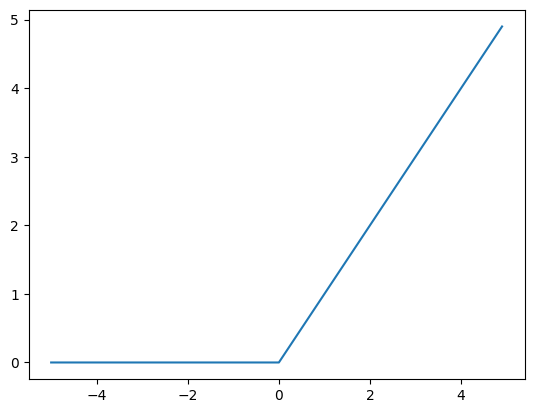

In [9]:
x = np.arange(-5.0, 5.0, .1)
y = relu(x)
plt.plot(x, y)
plt.show()

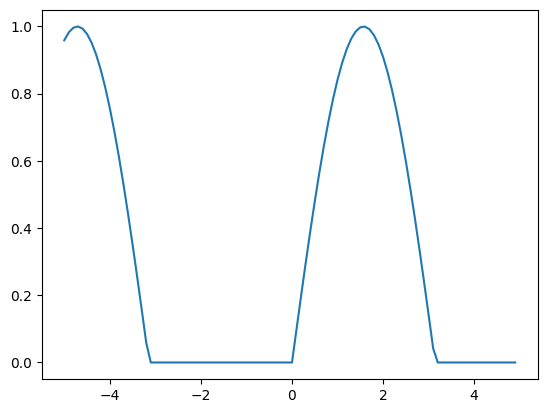

In [10]:
# 대충 정류기 이렇게 작동~!
x = np.arange(-5.0, 5.0, .1)
y = relu(np.sin(x))
plt.plot(x, y)
plt.show()

### 비선형 왜 쓰는지에 대한 느낌적 느낌

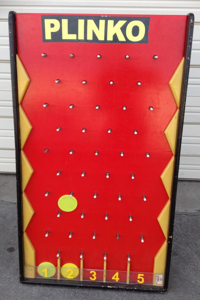

In [11]:
notebook_dp_image('./images/W3/vcvsvsiu.png', (200, 300))

비선형 쓰면 플링토 느낌, 어디놓는지에 따라 각 레이어별 무조건 왼쪽 아니면 오른쪽으로 향하여 최종 답으로 흘러감, 반면 선형방정식을 쌓아서 쓰면 미끄럼틀 달린 핀볼처럼 다 한군데로 갈거임!

---

## 다차원 배열의 계산

이건 뭐 다 알 것 같은 느낌?

그냥 알면 좋을법 한것 중 하나는 numpy에서 1차원 배열을 표현할 때 이렇게 나온다는 점에서:
```python
>>> A = np.array([7, 8, 9])
>>> A.shape
(3,)
```
여기서 나오는 `(3,)`은...
`(3, 1)`, `(1, 3)`, `(3, 0)`, `(0, 3)` 중 하나인가??

<details>
    <summary><b>뭘까요?</b></summary>
    <br>
    <i>아닙니다! 그냥 (3)임.</i><br>
    파이썬 syntax가 꽤나 너그러워서 그럼, 다른 언어는 끝에 <code>,</code> 더 붙이면 뭐라 하는데 파이썬은 알아서 무시함<br>
    뒤에 <code>,</code> 붙인거는 numpy에서 관용적으로 1차원 표현용으로 관용적으로 사용할 뿐<br>
    다른 차원의 ndarray들과 계산할 경우 <code>(3, 1)</code>로 변환이 된다는 점,<br>
    이건 <code>(3,)</code>와 엄연히 다름!
</details>

```python
test = [
    [1, 2,],
    [3, 4,],
    [5, 6,],
]
```

---

## 3층 신경망 구현

좀 색다르게 텐서플로우로!

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2025-03-27 03:46:17.084160: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 03:46:17.162958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 03:46:17.231700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743014777.293047  102487 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743014777.310902  102487 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743014777.445203  102487 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

**Q**: 아래의 데이터를 왜 255로 나누는가?

**A**: 정규화 하는거요! 각 픽셀 데이터다 0~255인데 활성화 함수들을 보면 대게 활성화 지점이 0부근임, 일종의 0 가까이 붙이는 압축과정

책에서는...
```python
(x_train, y_train), (x_test, y_test) = \
    mnist.load_mnist(
        flatten = True,  # 아래의 `reshape`
        normalize = False  # 아래의 `/255.`
    )
```

In [13]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.

원핫 인코딩을 하는 경우에는 이 코드를 쓸꺼임:
```python
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
```

이제 실제 모델 만들 차례:

Sequential -> 순차적(?) 모델
한방향으로 일단 흘러가는 간단한 모델 형

위에서부터 아래로 흘러감 ~

In [14]:
model = Sequential([
    Dense(50, activation='relu',    # 은닉층 1번
          input_shape=(784,)),      # 입력층
    Dense(100, activation='relu'),  # 은닉층 2번
    Dense(10, activation='softmax') # 출력층 (소프트맥스)
])

# 컴파일 해서 훈련 준비
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # 여기 주목! 원핫 했을때 안했을때 차이
              metrics=['accuracy'])

/home/maxjo/Projects/DaeNaMu/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1743014779.658104  102487 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743014779.658405  102487 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


note: batch processing은 얘가 알아서 해줌!

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7814 - loss: 0.7479 - val_accuracy: 0.9398 - val_loss: 0.2067
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9443 - loss: 0.1919 - val_accuracy: 0.9553 - val_loss: 0.1513
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9601 - loss: 0.1367 - val_accuracy: 0.9613 - val_loss: 0.1321
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9673 - loss: 0.1109 - val_accuracy: 0.9629 - val_loss: 0.1248
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9715 - loss: 0.0969 - val_accuracy: 0.9639 - val_loss: 0.1188
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9747 - loss: 0.0834 - val_accuracy: 0.9627 - val_loss: 0.1331
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9660 - val_loss: 0.1172
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9824 - loss: 0.0605 - val_accuracy: 0.

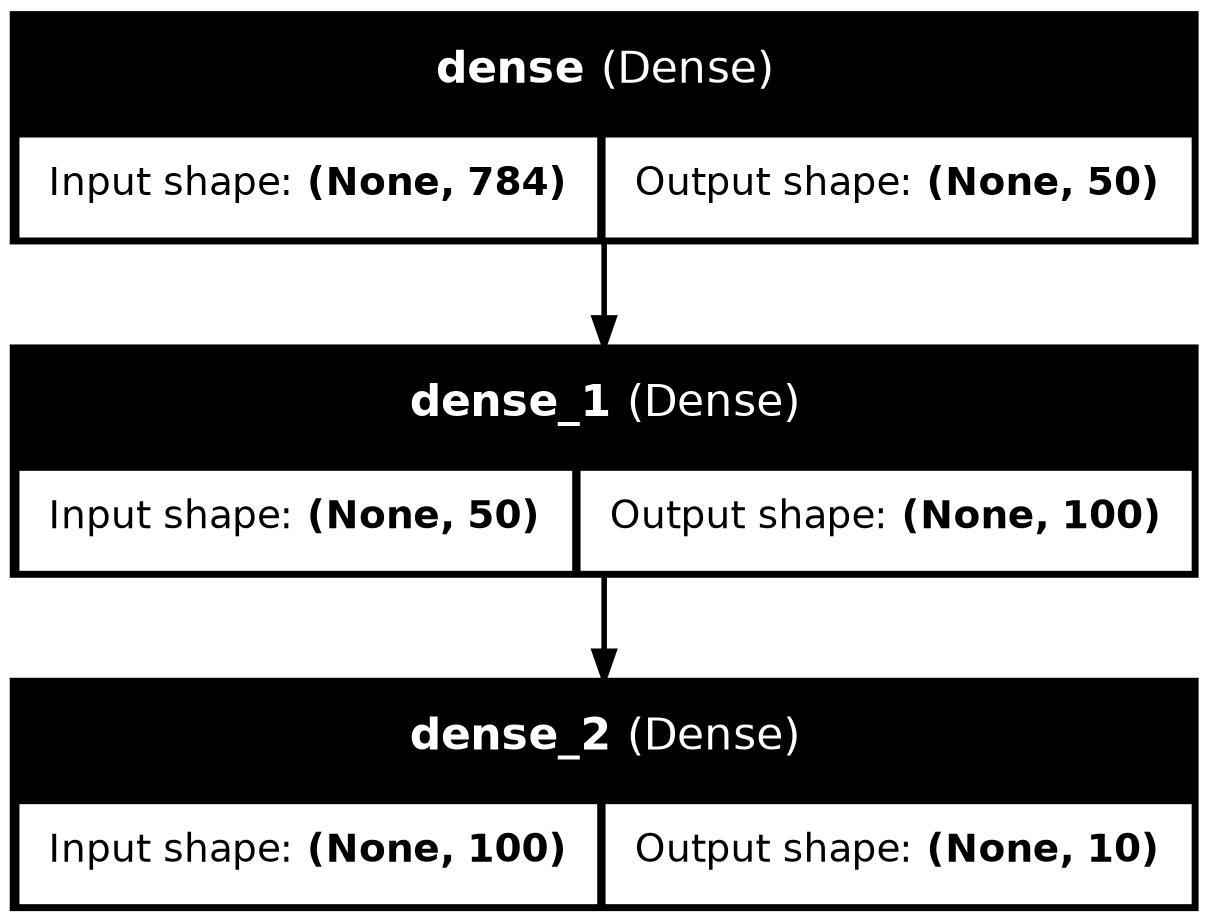

In [15]:
# 피팅/훈련
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=100, # 얘가 차피 자동으로 batch processing해줌 ~!
          validation_split=0.2)

# 테스트/검증
loss, accuracy = model.evaluate(x_test, y_test)
print("정확도:", accuracy)

# 그려보기!
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)